In [11]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), "packages"))
import getimage
import improcess
from numpy import *
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from scipy import signal

## Input Data Set

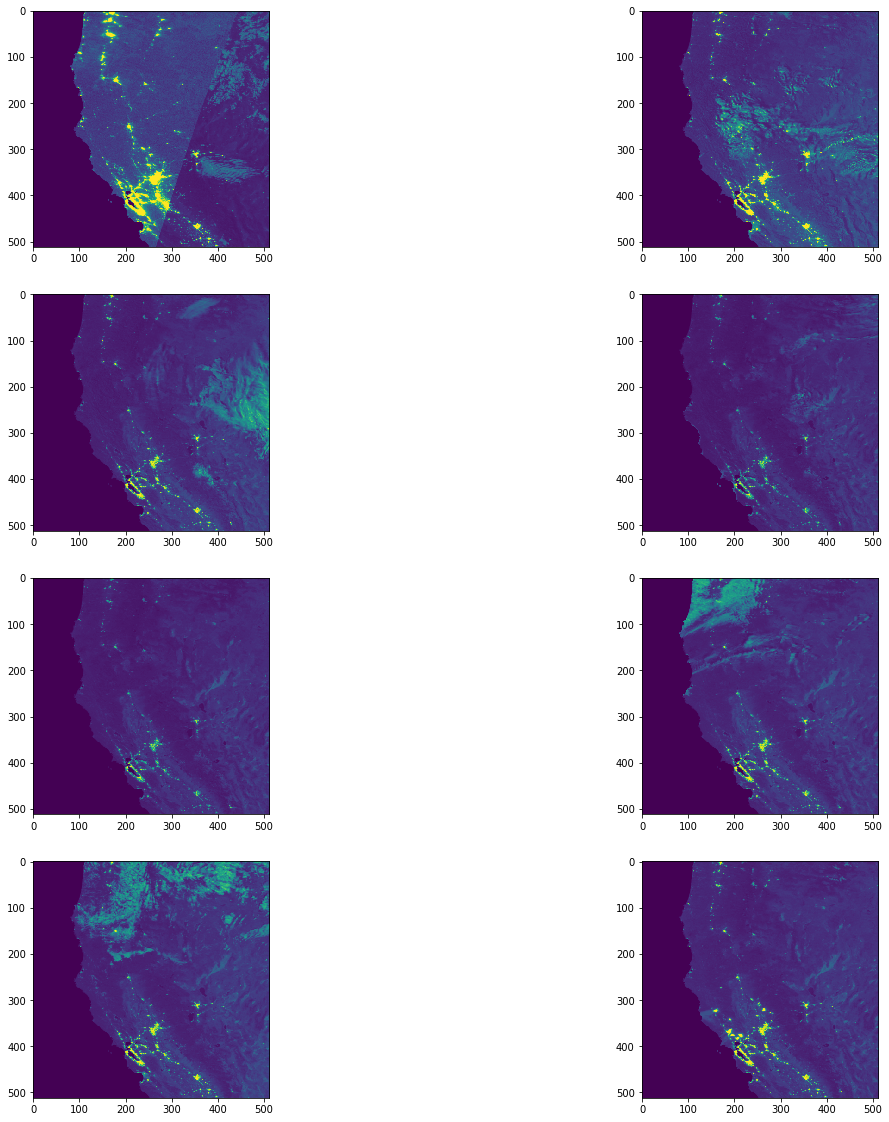

In [8]:
l = getimage.get_image_date_range()
fig=plt.figure(figsize=(20,20))
columns = 2
rows = 4
for i in range(1, columns*rows +1):
    img = l[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Only with Averaging 

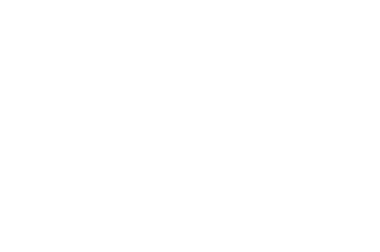

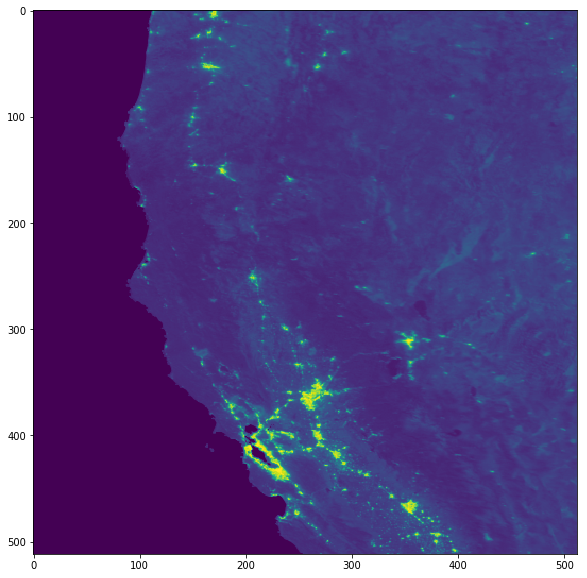

In [13]:
l = getimage.get_image_date_range()

plt.axis('off')

w,h=l[0].shape
arr=zeros((h,w),float)
N=len(l)



for im in l:
    imarr=array(im,dtype=float)
    arr=arr+imarr/N
    out = matrix.round(arr)
fig=plt.figure(figsize=(10,10))
plt.imshow(out)    

## Added Wiener Filter to Denoise

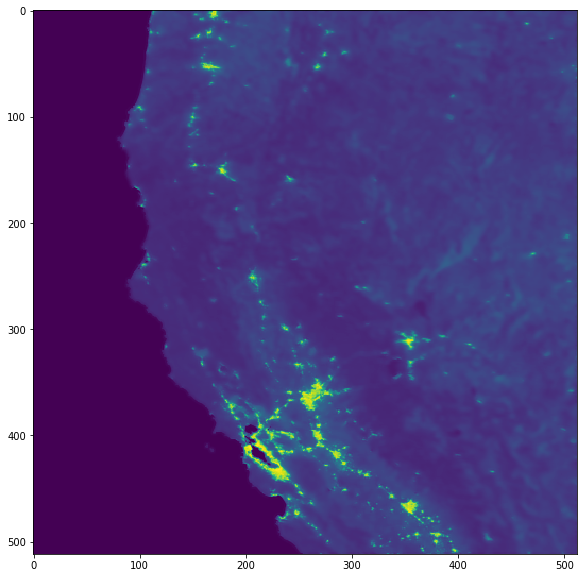

In [14]:
after_wiener=signal.wiener(out,5)
fig=plt.figure(figsize=(10,10))
plt.imshow(after_wiener)   

## Sample cloud region to get cloud-like pixel intensity and then suppress those pixels

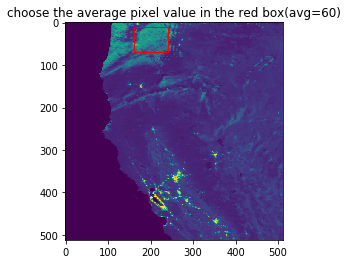

In [27]:
import matplotlib.patches as patches
from PIL import Image

im=l[6]
fig,ax = plt.subplots(1)
ax.imshow(im)
rect = patches.Rectangle((160,10),80,60,linewidth=1,edgecolor='r',facecolor='none')


ax.add_patch(rect)
plt.title('choose the average pixel value in the red box(avg=60)')
plt.show()



## Final Result

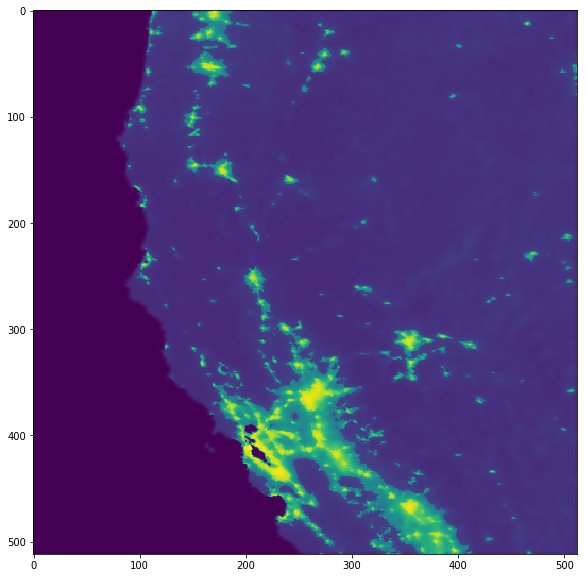

In [28]:
pp=improcess.get_processed_image()
fig=plt.figure(figsize=(10,10))
plt.imshow(pp)